In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
wine = pd.read_csv("winequality-red.csv",sep=";")
#whitewine = pd.read_csv("winequality-white.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


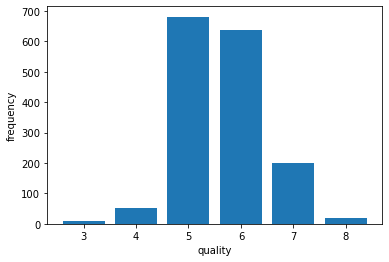

In [4]:
quality_dist = wine['quality'].value_counts()
plt.bar(quality_dist.index, quality_dist)
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

Quality欄位表示Wine的品質，數值越高代表品越好；目前有{3,4,5,6,7,8}之分，需將分類為「好」、「壞」

In [5]:
wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

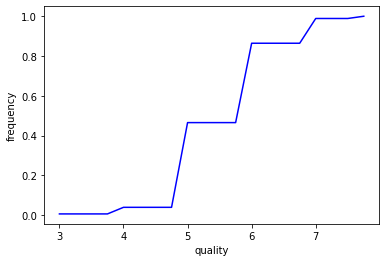

In [6]:
values, base = np.histogram(wine['quality'], bins=20)
cumulativ = np.cumsum(values/wine.shape[0])
plt.plot(base[:-1], cumulativ, c='blue')
plt.xlabel('quality')
plt.ylabel('frequency')
plt.show()

Quality中位數為6，平均數為5.6，將紅酒小於等於6之品質歸類為「Poor」，數值為1；大於則歸類為「Good」，數值為2

In [7]:
indexspoor = wine.loc[wine['quality'] <= 6].index
indexsGood = wine.loc[wine['quality'] > 6].index
wine.iloc[indexspoor, wine.columns.get_loc('quality')] = 0
wine.iloc[indexsGood, wine.columns.get_loc('quality')] = 1

In [8]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Decision Tree

In [58]:
x = wine.drop('quality',axis=1)
y = wine['quality']

In [59]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.40, random_state = 42)

In [64]:
clfTre = tree.DecisionTreeClassifier(max_depth=3)#max_depth=3
clfTre.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

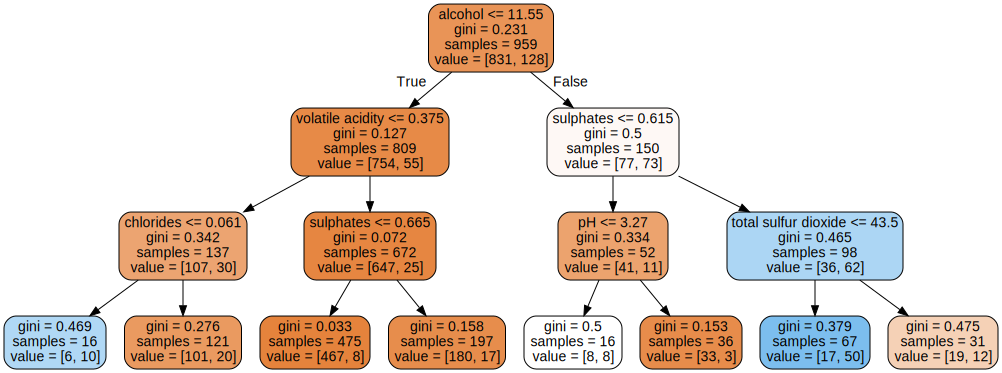

In [65]:
#Visualizing the decision tree
#需先安裝Graphviz
dot_data = tree.export_graphviz(clfTre, out_file=None,feature_names=list(x.columns.values), filled=True, rounded=True)
valgTre = graphviz.Source(dot_data) 
valgTre
#Alcohol= 酒精
#Volatile Acidity= 揮發性酸度
#Sulphates= 硫酸鹽

In [66]:
 # 預測成功的比例
print('訓練集: ',clfTre.score(xTrain,yTrain))
print('測試集: ',clfTre.score(xTest,yTest))

訓練集:  0.9051094890510949
測試集:  0.8484375


# Random Forest

In [50]:
# 建立RandomForest模型
rf = RandomForestClassifier(n_estimators=100,oob_score=True ,random_state=0)
# 使用訓練資料訓練模型
rf.fit(xTrain, yTrain)
# 使用訓練資料預測分類
predicted = rf.predict(xTrain)

In [54]:
 # 預測成功的比例
print('訓練集: ',rf.score(xTrain,yTrain))
print('測試集: ',rf.score(xTest,yTest))

訓練集:  1.0
測試集:  0.8859375


In [53]:
print('特徵重要程度: ',rf.feature_importances_)

特徵重要程度:  [0.06577898 0.11277    0.09081331 0.05677879 0.07689973 0.05710678
 0.07957291 0.09319467 0.06227166 0.11417225 0.19064092]
